# Assigment 3
Submission by:

> Darsh Kumar

## Importing Libraries and Dataset

In [11]:
# Prelim code - Reduce console verbose
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [12]:
# Importing required libraries
import pandas as pd
import numpy as np
import PIL
import pathlib

import matplotlib.pyplot as plt


import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.utils import image_dataset_from_directory


In [13]:
dataDir = pathlib.Path('./archive')
imgHeight = 256
imgWidth = 256

trainData = image_dataset_from_directory(dataDir.joinpath('train_data'), image_size = (imgHeight, imgWidth))
testData = image_dataset_from_directory(dataDir.joinpath('test_data'), image_size = (imgHeight, imgWidth))

classNames = trainData.class_names

Found 150 files belonging to 16 classes.
Found 157 files belonging to 16 classes.


## Visualizing Data

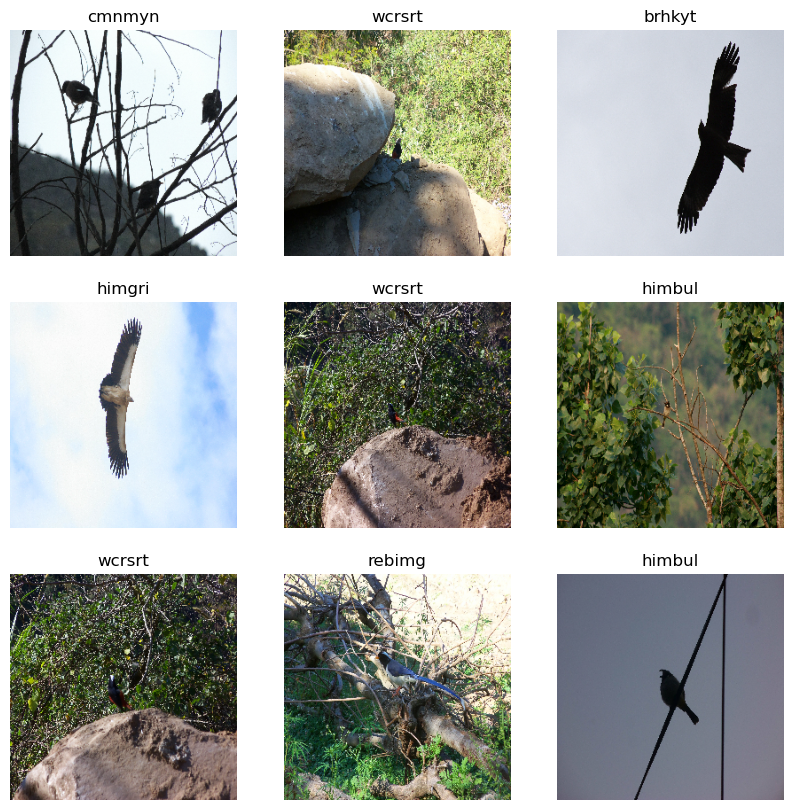

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in trainData.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]])
        plt.axis('off')

## Data Preprocessing

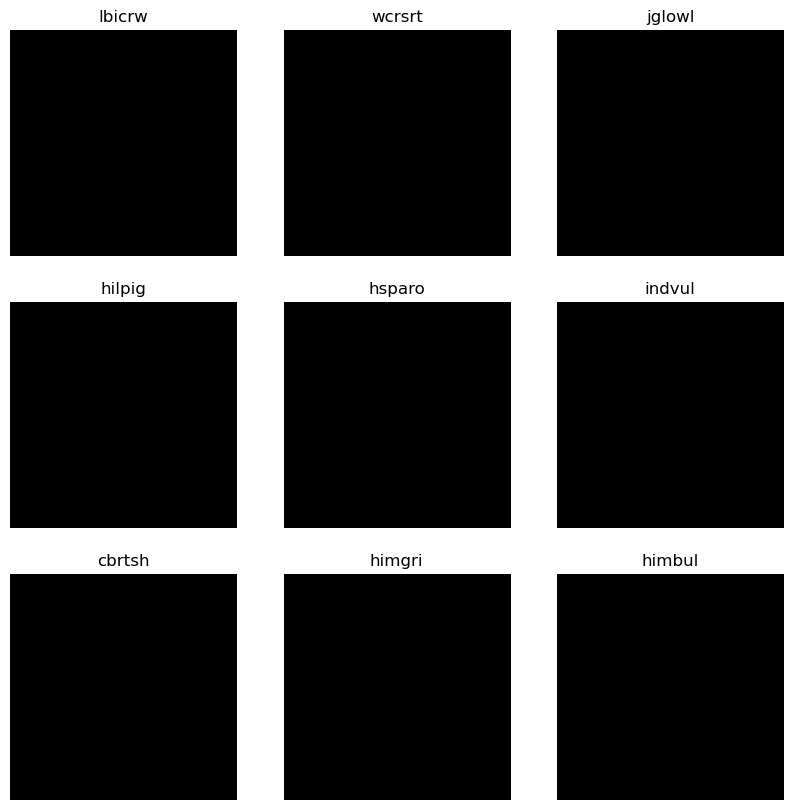

In [15]:
# Normalizing data
normLayer = layers.Rescaling(1./255)

normTrainData = trainData.map(lambda x, y: (normLayer(x), y))
plt.figure(figsize=(10, 10))
for images, labels in normTrainData.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classNames[labels[i]])
        plt.axis('off')


Images appear black since all rgb values are scaled from [0, 255] to [0, 1]

## Defining and Fitting CNN Model


In [16]:
model = Sequential([
    layers.Conv2D(16, 3, input_shape=(imgHeight, imgWidth, 3), padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, input_shape=(imgHeight, imgWidth, 3), padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, input_shape=(imgHeight, imgWidth, 3), padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(len(classNames))
])
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)      

In [17]:
epoch = 25
history = model.fit(normTrainData, epochs = epoch)

Epoch 1/25
5/5 [==============================] - 9s 223ms/step - loss: 3.3330 - accuracy: 0.1400
Epoch 2/25
5/5 [==============================] - 2s 46ms/step - loss: 2.5034 - accuracy: 0.2067
Epoch 3/25
5/5 [==============================] - 2s 55ms/step - loss: 2.2925 - accuracy: 0.2400
Epoch 4/25
5/5 [==============================] - 2s 59ms/step - loss: 1.9974 - accuracy: 0.3400
Epoch 5/25
5/5 [==============================] - 2s 50ms/step - loss: 1.7057 - accuracy: 0.4600
Epoch 6/25
5/5 [==============================] - 2s 53ms/step - loss: 1.3954 - accuracy: 0.5400
Epoch 7/25
5/5 [==============================] - 2s 43ms/step - loss: 1.0206 - accuracy: 0.7200
Epoch 8/25
5/5 [==============================] - 2s 59ms/step - loss: 0.7769 - accuracy: 0.7800
Epoch 9/25
5/5 [==============================] - 2s 55ms/step - loss: 0.5022 - accuracy: 0.8533
Epoch 10/25
5/5 [==============================] - 2s 56ms/step - loss: 0.5008 - accuracy: 0.9133
Epoch 11/25
5/5 [===========

## Evaluating Model Performance

### Training Results

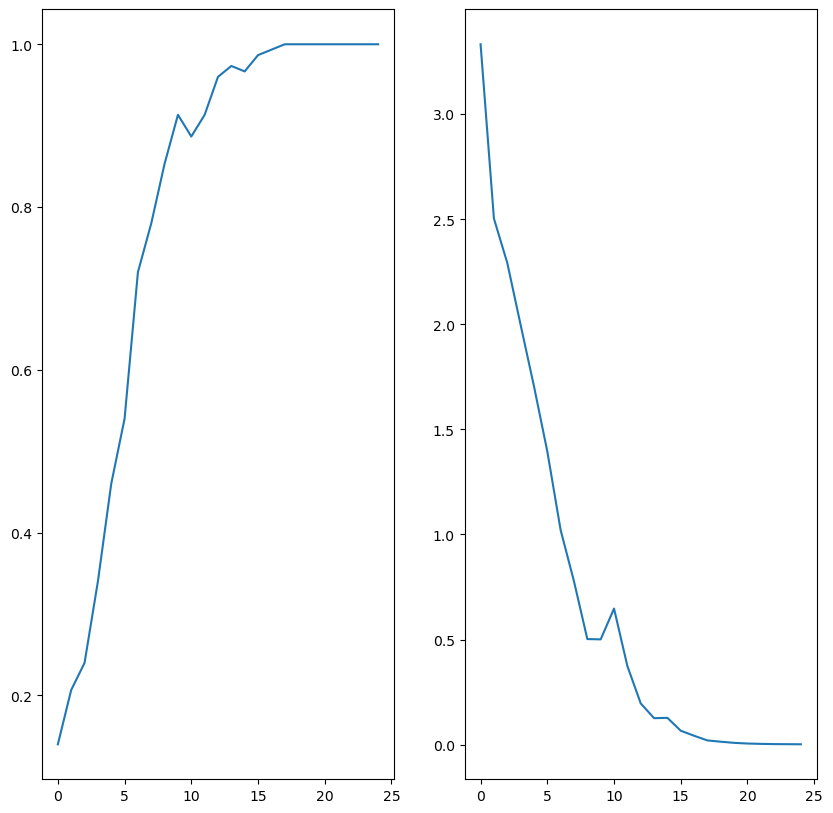

In [18]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(epoch)

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label = 'Training Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label = 'Training Loss')
plt.show()

### Testing on new Data

In [19]:
normTestData = testData.map(lambda x, y: (normLayer(x), y))

actualLabs = list()
for image, label in normTestData:
    for l in label:
    	actualLabs.append(l)

pred = model.predict(normTestData)
for i in range(len(pred)):
    score = tf.nn.softmax(pred[i])
    print("Prediction: " + classNames[np.argmax(score)] + " ({:.2f}%)".format(100 * np.max(score)))
    print("Actual: " + classNames[actualLabs[i]])

5/5 [==============================] - 3s 93ms/step
Prediction: blasti (99.72%)
Actual: gretit
Prediction: bonegl (93.33%)
Actual: jglowl
Prediction: hsparo (28.30%)
Actual: cmnmyn
Prediction: indvul (66.33%)
Actual: bonegl
Prediction: indvul (88.58%)
Actual: himgri
Prediction: indvul (97.46%)
Actual: mgprob
Prediction: himbul (81.81%)
Actual: lbicrw
Prediction: himgri (100.00%)
Actual: jglowl
Prediction: hilpig (42.53%)
Actual: bonegl
Prediction: himbul (32.56%)
Actual: rebimg
Prediction: blasti (92.67%)
Actual: blasti
Prediction: rebimg (97.80%)
Actual: blasti
Prediction: himbul (99.90%)
Actual: jglowl
Prediction: indvul (69.51%)
Actual: himbul
Prediction: indvul (95.49%)
Actual: wcrsrt
Prediction: himgri (97.02%)
Actual: indvul
Prediction: brhkyt (94.12%)
Actual: cmnmyn
Prediction: himgri (85.79%)
Actual: cmnmyn
Prediction: himbul (99.42%)
Actual: brhkyt
Prediction: hilpig (35.57%)
Actual: gretit
Prediction: lbicrw (100.00%)
Actual: blasti
Prediction: blasti (84.48%)
Actual: cbrtsh
